In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Carga de DF

In [2]:
df = pd.read_excel (r'/Users/jucamuyrano/Desktop/Jupyter/base_total.xlsx')

In [3]:
df.shape

(7483, 24)

In [4]:
df.head()

,CUS_CUST_ID,sit_site_id,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,flag_tpv_high,flag_tpv_low,...,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,flag_depurar
0,25,MLA,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,1,1,1
1,777,MLB,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,1,1,1
2,999,MLB,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,1,1,1
3,9999,MEC,0,0,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0,0,0,1,1,1
4,29996,MLM,1,0,0,1,0,0,0,0,...,0.0,0,0.0,0.0,0,1,0,1,1,1


In [5]:
df.columns

Index(['CUS_CUST_ID', 'sit_site_id', 'flag_ca', 'flag_mia', 'flag_up',
       'flag_trusted_seller', 'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high',
       'flag_tpv_low', 'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo', 'flag_depurar'],
      dtype='object')

In [6]:
df.value_counts('flag_depurar')

flag_depurar
0    5221
1    2262
dtype: int64

In [7]:
df_b=df[df['flag_depurar']==0]

In [8]:
df_b.value_counts('flag_depurar')

flag_depurar
0    5221
dtype: int64

In [9]:
df_m=df[df['flag_depurar']==1]

In [10]:
df_m.value_counts('flag_depurar')

flag_depurar
1    2262
dtype: int64

### Usarios Activos

In [26]:
df['activo'].value_counts()

1    6232
0    1251
Name: activo, dtype: int64

In [27]:
gb = df.groupby(['flag_depurar','activo']).size()
gb = gb.reset_index()
gb = pd.pivot_table(gb,columns='activo',index='flag_depurar',values=0)
gb.fillna(0, inplace=True)
gb

activo,0,1
flag_depurar,,
0,2,5219
1,1249,1013


<AxesSubplot:title={'center':'Active Users'}, xlabel='flag_depurar'>

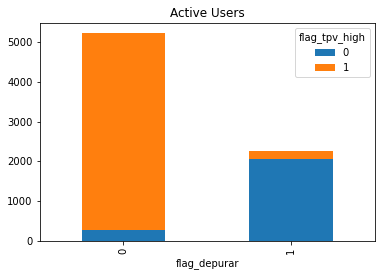

In [32]:
gb.plot(kind='bar',
        title = 'Active Users',
        stacked= True)

### TPV

In [33]:
df['flag_tpv_high'].value_counts()

1    5166
0    2317
Name: flag_tpv_high, dtype: int64

In [34]:
gb = df.groupby(['flag_depurar','flag_tpv_high']).size()
gb = gb.reset_index()
gb = pd.pivot_table(gb,columns='flag_tpv_high',index='flag_depurar',values=0)
gb.fillna(0, inplace=True)
gb

flag_tpv_high,0,1
flag_depurar,,
0,271,4950
1,2046,216


<AxesSubplot:title={'center':'High TPV'}, xlabel='flag_depurar'>

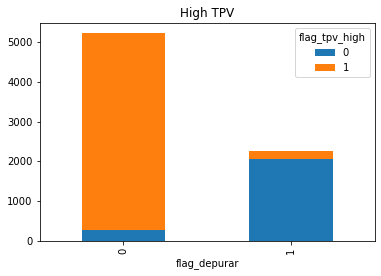

In [35]:
gb.plot(kind='bar',
        title = 'High TPV',
        stacked= True)

### Cartera Asesorada

In [36]:
df['flag_ca'].value_counts()

1    5542
0    1941
Name: flag_ca, dtype: int64

In [37]:
gb = df.groupby(['flag_depurar','flag_ca']).size()
gb = gb.reset_index()
gb = pd.pivot_table(gb,columns='flag_ca',index='flag_depurar',values=0)
gb.fillna(0, inplace=True)
gb

flag_ca,0,1
flag_depurar,,
0,589,4632
1,1352,910


<AxesSubplot:title={'center':'CA'}, xlabel='flag_depurar'>

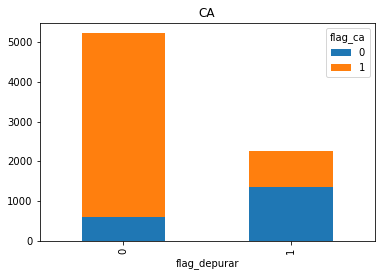

In [38]:
gb.plot(kind='bar',
        title = 'CA',
        stacked= True)

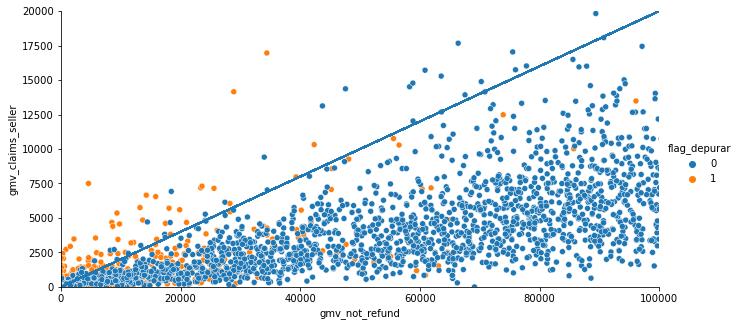

In [11]:
sns.relplot(data=df, x="gmv_not_refund", y="gmv_claims_seller", hue="flag_depurar",kind="scatter", height=4.7, aspect=1.9)
plt.plot(df['gmv_not_refund'], 0.2*df['gmv_not_refund'])

plt.xlim(0,100000)
plt.ylim(0,20000);

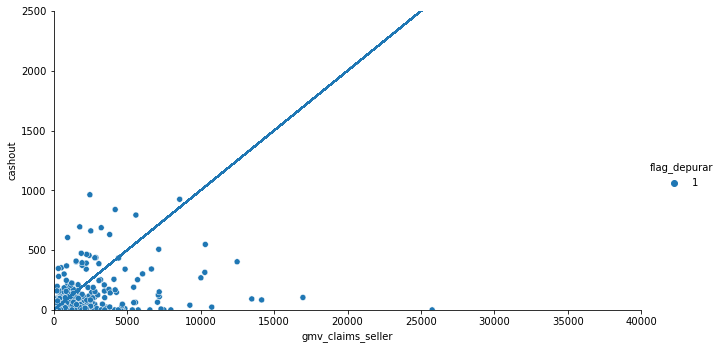

In [12]:
sns.relplot(data=df_m, x="gmv_claims_seller", y="cashout", hue="flag_depurar",kind="scatter", height=4.7, aspect=1.9)
plt.plot(df['gmv_claims_seller'], 0.1*df['gmv_claims_seller'])

plt.xlim(0,40000)
plt.ylim(0,2500);

In [19]:
group = df[['activo','flag_depurar']].groupby('flag_depurar').count()
group

,activo
flag_depurar,
0,5221
1,2262


In [ ]:
group.plot(kind = 'bar', 
            title = 'Active Users')